In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential

In [78]:
df = pd.read_csv('TBL_TR_Accident_Driver.csv')

In [79]:
df.columns

Index([u'Registration_Number', u'Crime_No', u'Person_ID', u'Metal_No',
       u'Injury_Type', u'Licence', u'Licence_Type', u'Licence_Number',
       u'Licence_Valid_Date', u'Vehicle_Authorised', u'Possesing_Badges',
       u'Issued_By_Authority', u'DL_Last_renewed', u'Driver_Error',
       u'Alcohol_Drugs', u'Helmet', u'SeatBelt', u'Unit_ID', u'UserID',
       u'Modified_Unit_ID', u'Action_Flag', u'Sync_Id', u'Sync_Id_Old',
       u'DEDT', u'Preliminary_Enquiry_Date', u'Remarks', u'Badge_No'],
      dtype='object')

In [80]:
df = pd.read_csv('TBL_TR_Accident_Driver.csv', usecols=['Injury_Type','Licence','Licence_Type','Possesing_Badges','Alcohol_Drugs','Helmet', 'SeatBelt'])

In [81]:
df

,Injury_Type,Licence,Licence_Type,Possesing_Badges,Alcohol_Drugs,Helmet,SeatBelt
0,0,1,6591,0,0,6218,6502
1,6235,1,6587,0,0,6490,0
2,0,1,6587,0,0,6490,0
3,0,1,6587,0,0,6490,0
4,0,1,6591,0,0,6490,0
5,0,1,6596,0,0,6490,0
6,6235,1,6591,0,6252,6219,6502
7,0,2,0,0,0,0,0
8,8452,1,6596,1,6515,6490,6502
9,0,1,6599,1,0,6490,0


In [82]:
df.drop_duplicates(inplace=True)

In [83]:
from keras.utils import normalize

def normalizer(col,df=df):
    df[col] = normalize(df[col])
    return df[col]

In [84]:
print df['Injury_Type'].unique()

[   0 6235 8452 6236 6233]


In [85]:
arr = list(df['Injury_Type'].unique())

In [86]:
arr

[0, 6235, 8452, 6236, 6233]

In [87]:
df['Injury_Type'] = df['Injury_Type'].apply(lambda x : arr.index(x))

In [88]:
df['Injury_Type'].describe()

count    6857.000000
mean        1.866122
std         1.372397
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Injury_Type, dtype: float64

In [89]:
df['Injury_Type'].unique()


array([0, 1, 2, 3, 4])

In [90]:
lic_type = list(df['Licence_Type'].unique())

In [91]:
df['Licence_Type'] = df['Licence_Type'].apply(lambda x : lic_type.index(x))

In [92]:
helm = list(df['Helmet'].unique())

In [93]:
seat = list(df['SeatBelt'].unique())

In [94]:
df['Helmet'] = df['Helmet'].apply(lambda x : helm.index(x))
df['SeatBelt'] = df['SeatBelt'].apply(lambda x : seat.index(x))

In [95]:
drugs = list(df['Alcohol_Drugs'].unique())
df['Alcohol_Drugs'] = df['Alcohol_Drugs'].apply(lambda x: drugs.index(x))

In [104]:
from sklearn.preprocessing import OneHotEncoder

ohe =  OneHotEncoder(categorical_features = [0,1,2,3,4,5])

In [105]:
df

,Injury_Type,Licence,Licence_Type,Possesing_Badges,Alcohol_Drugs,Helmet,SeatBelt
0,0,1,0,0,0,0,0
1,1,1,1,0,0,1,1
2,0,1,1,0,0,1,1
4,0,1,0,0,0,1,1
5,0,1,2,0,0,1,1
6,1,1,0,0,1,2,0
7,0,2,3,0,0,3,1
8,2,1,2,1,2,1,0
9,0,1,4,1,0,1,1
11,2,2,3,0,0,2,0


In [106]:
y_train = df['Injury_Type']
x_train = df.iloc[:,1:]

In [107]:
x_train = ohe.fit_transform(x_train).toarray()
y_train = np.array(y_train)

In [111]:
x_train[0].shape

(43,)

In [110]:
y_train

array([0, 1, 0, ..., 4, 3, 4])

In [201]:
model = Sequential()
model.add(Dense(512, input_shape=x_train[0].shape, activation='relu'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['mae','mse'], optimizer='adam')

In [202]:
from keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_loss', patience=10)

In [204]:
history = model.fit(x_train, y_train, validation_split=0.15, batch_size=128, epochs=40)

Train on 5828 samples, validate on 1029 samples
Epoch 1/40
5828/5828 [==============================] - 1s 94us/step - loss: 1.3233 - mean_absolute_error: 1.7394 - mean_squared_error: 4.6145 - val_loss: 3.6192 - val_mean_absolute_error: 1.8453 - val_mean_squared_error: 5.1065
Epoch 2/40
5828/5828 [==============================] - 1s 86us/step - loss: 1.3224 - mean_absolute_error: 1.7394 - mean_squared_error: 4.6143 - val_loss: 3.8117 - val_mean_absolute_error: 1.8453 - val_mean_squared_error: 5.1105
Epoch 3/40
5828/5828 [==============================] - 1s 91us/step - loss: 1.3238 - mean_absolute_error: 1.7394 - mean_squared_error: 4.6142 - val_loss: 3.6721 - val_mean_absolute_error: 1.8453 - val_mean_squared_error: 5.1054
Epoch 4/40
5828/5828 [==============================] - 1s 91us/step - loss: 1.3258 - mean_absolute_error: 1.7394 - mean_squared_error: 4.6142 - val_loss: 3.1193 - val_mean_absolute_error: 1.8453 - val_mean_squared_error: 5.0943
Epoch 5/40
5828/5828 [==============

5828/5828 [==============================] - 1s 99us/step - loss: 1.2893 - mean_absolute_error: 1.7394 - mean_squared_error: 4.6171 - val_loss: 4.4901 - val_mean_absolute_error: 1.8453 - val_mean_squared_error: 5.1140
Epoch 37/40
5828/5828 [==============================] - 1s 117us/step - loss: 1.2840 - mean_absolute_error: 1.7394 - mean_squared_error: 4.6178 - val_loss: 4.2383 - val_mean_absolute_error: 1.8453 - val_mean_squared_error: 5.1113
Epoch 38/40
5828/5828 [==============================] - 1s 99us/step - loss: 1.2827 - mean_absolute_error: 1.7394 - mean_squared_error: 4.6176 - val_loss: 4.4443 - val_mean_absolute_error: 1.8453 - val_mean_squared_error: 5.1155
Epoch 39/40
5828/5828 [==============================] - 1s 115us/step - loss: 1.2862 - mean_absolute_error: 1.7394 - mean_squared_error: 4.6176 - val_loss: 4.5669 - val_mean_absolute_error: 1.8453 - val_mean_squared_error: 5.1170
Epoch 40/40
5828/5828 [==============================] - 1s 103us/step - loss: 1.2924 - me

In [199]:
def build_model():
    
    model = Sequential()
    model.add(Dense(512, input_shape=features[0].shape, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

In [129]:
model.save('categorical_model_sigmoid')

In [167]:
from sklearn.neighbors import KNeighborsClassifier
x_test = x_train[:200]
y_test = y_train[:200]
print x_test.shape, y_test.shape

(200, 43) (200,)


In [168]:
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(x_train[200:],y_train[200:])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=80, p=2,
           weights='uniform')

In [169]:
y_pred = knn.predict(x_test)

In [170]:
from sklearn.metrics import confusion_matrix as cm

conf = cm(y_test, y_pred)


In [171]:
from sklearn.metrics import classification_report as cr

report = cr(y_test, y_pred)

In [172]:
print type(knn)

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


In [175]:
import pickle

with open('knn_model.pkl','wb') as f:
    pickle.dump(knn,f)


In [208]:
new_df = pd.read_csv('TBL_TR_Accident_Driver.csv', usecols=['Injury_Type','Licence','Licence_Type','Possesing_Badges','Alcohol_Drugs','Helmet', 'SeatBelt'])

In [209]:
new_df.corr()

,Injury_Type,Licence,Licence_Type,Possesing_Badges,Alcohol_Drugs,Helmet,SeatBelt
Injury_Type,1.000000,-0.042179,0.048341,0.287263,0.567386,-0.043815,0.338095
Licence,-0.042179,1.000000,-0.960206,-0.154278,-0.046169,-0.114188,-0.115077
Licence_Type,0.048341,-0.960206,1.000000,0.163836,0.054174,0.135183,0.122700
Possesing_Badges,0.287263,-0.154278,0.163836,1.000000,0.352036,0.024631,0.306515
Alcohol_Drugs,0.567386,-0.046169,0.054174,0.352036,1.000000,-0.018912,0.347161
Helmet,-0.043815,-0.114188,0.135183,0.024631,-0.018912,1.000000,-0.029739
SeatBelt,0.338095,-0.115077,0.122700,0.306515,0.347161,-0.029739,1.000000


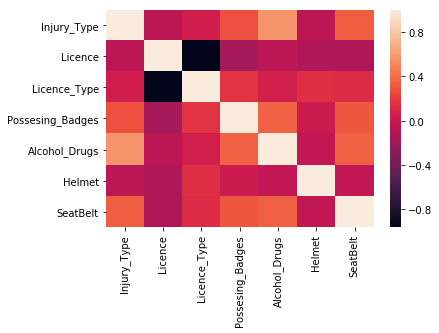

In [210]:
import seaborn as sns

sns.heatmap(new_df.corr())

In [186]:
new_df.dropna(inplace=True)
new_df.drop_duplicates(inplace=True)

In [187]:
target = new_df['Injury_Type']
features = new_df.iloc[:,1:]

In [190]:
print features.shape, target.shape
features, target = np.array(features), np.array(target)

(6857, 6) (6857,)
